## Nama : Setiawati Nugraheni 
## NPM : 23083010018
## : Analisis Data Eksploratif (A)


####
Kode ini mempersiapkan lingkungan untuk analisis  dan visualisasi data dengan mengimpor pustaka utama seperti Pandas, NumPy, Seaborn, Matplotlib, dan SciPy.
%matplotlib inline digunakan untuk memungkinkan plot/grafik ditampilkan langsung di notebook.
Penggunaan %pylab inline sudah tidak digunakan lagi (tidak digunakan lagi) dan harus diganti dengan %matplotlib inline dan perpustakaan terkait harus diimpor secara eksplisit.
Fokus kode ini adalah  menyediakan alat  lengkap untuk manipulasi data, analisis statistik, dan visualisasi data di lingkungan Jupyter Notebook.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Menampilkan dataset

In [14]:
data = pd.read_csv ("C:/Users/hani/Downloads/Dataset Pelatihan.csv")
data.head()

,ID,Nama,Umur,Gender,Nilai,Matkul,Tanggal,UTS,UAS
0,1.0,Budi,24.0,Laki-laki,85.0,Kimia,9/8/2023,90.0,80.0
1,2.0,Ani,21.0,Perempuan,77.5,Matematika,15/8/2023,75.0,80.0
2,3.0,Joko,20.0,Laki-laki,90.0,Biologi,15/8/2023,85.0,95.0
3,4.0,Siti,21.0,Perempuan,60.0,Matematika,9/8/2023,55.0,65.0
4,5.0,Agus,23.0,Laki-laki,77.5,Fisika,9/8/2023,80.0,75.0


## Mencari Missing Value

In [15]:
np.sum(data.isnull())

ID         10
Nama       10
Umur       10
Gender     10
Nilai      10
Matkul     10
Tanggal    10
UTS        10
UAS        10
dtype: int64

In [16]:
data['ID'].fillna("None", inplace=True)
data['Nama'].fillna("None", inplace=True) 
data['Umur'].fillna("None", inplace=True) 
data['Gender'].fillna("None", inplace=True) 
data['Nilai'].fillna("None", inplace=True) 
data['Matkul'].fillna("None", inplace=True) 
data['Tanggal'].fillna("None", inplace=True) 
data['UTS'].fillna("None", inplace=True) 
data['UAS'].fillna("None", inplace=True) 

np.sum(data.isnull())

ID         0
Nama       0
Umur       0
Gender     0
Nilai      0
Matkul     0
Tanggal    0
UTS        0
UAS        0
dtype: int64

#### 
Kode tersebut untuk menampilkan apakah data yang dipakai ada missing valuenya.
Sebelum data dibersihkan, setiap kolom dalam kumpulan data memiliki 10 nilai yang hilang.
Nilai yang hilang di semua kolom (ID, Nama, Umur, Jenis Kelamin, Nilai, Matkul, Tanggal, UTS, UAS) akan diganti dengan string 'Tidak Ada'.
Setelah diisi dengan fillna("None"), semua kolom tidak lagi memiliki nilai yang hilang (nilai yang hilang adalah 0).
Hasil akhirnya adalah dataset tidak ada nilai yang hilang dan siap untuk dianalisis lebih lanjut.

## Mengidentifikasi apakah data tersebut terdapat outlier


Mendeteksi outliers pada kolom: ID
Batas Bawah: -48.5, Batas Atas: 149.5
Jumlah outliers di kolom ID: 0


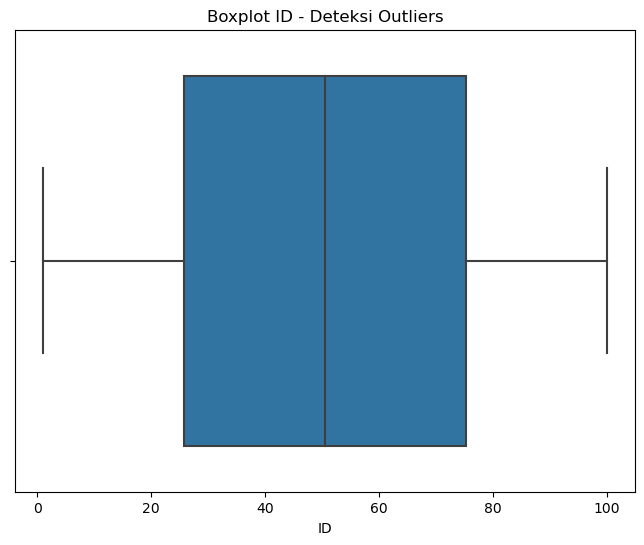


Mendeteksi outliers pada kolom: Umur
Batas Bawah: 18.0, Batas Atas: 26.0
Jumlah outliers di kolom Umur: 0


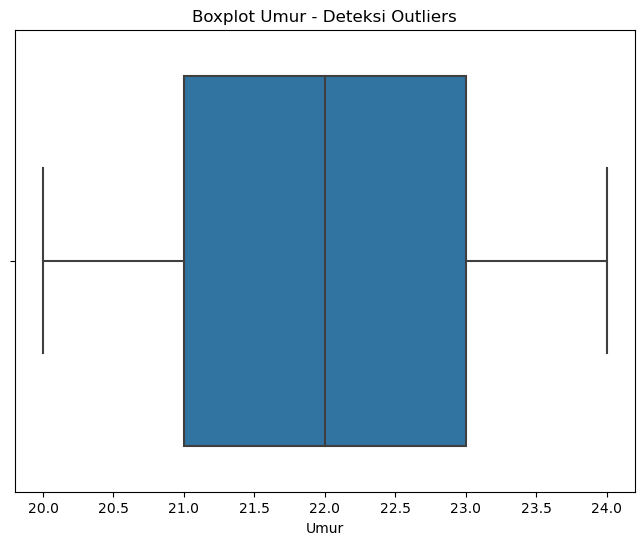


Mendeteksi outliers pada kolom: Nilai
Batas Bawah: 0.19117647058823506, Batas Atas: 1.1323529411764706
Jumlah outliers di kolom Nilai: 1
   Nilai
3    0.0


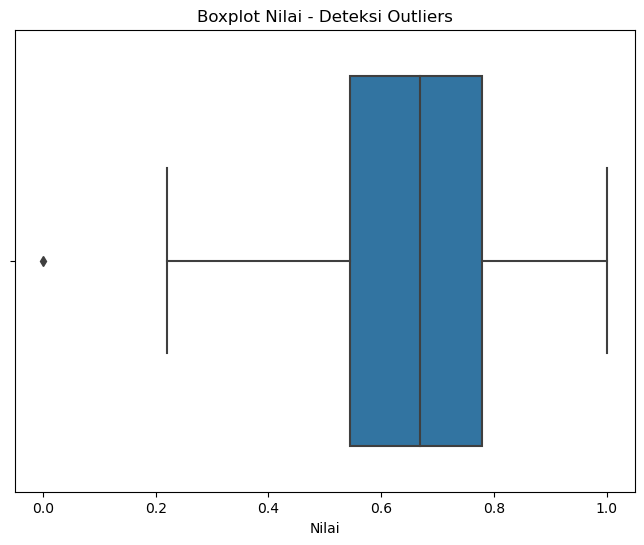


Mendeteksi outliers pada kolom: UTS
Batas Bawah: 0.07500000000000007, Batas Atas: 1.2750000000000004
Jumlah outliers di kolom UTS: 1
   UTS
3  0.0


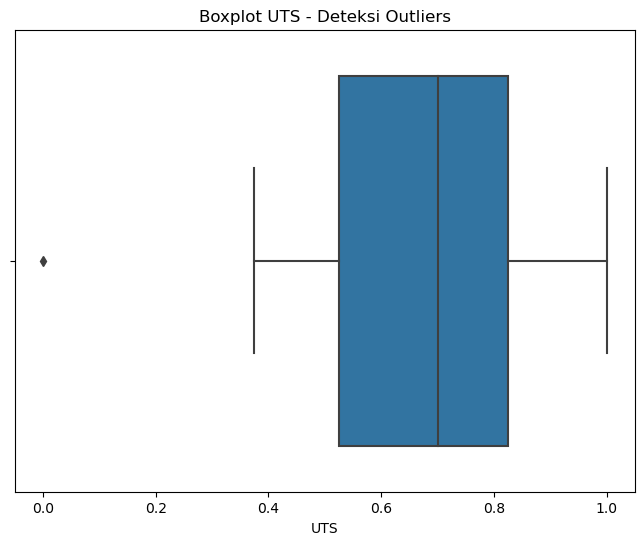


Mendeteksi outliers pada kolom: UAS
Batas Bawah: -0.4166666666666665, Batas Atas: 1.5833333333333335
Jumlah outliers di kolom UAS: 0


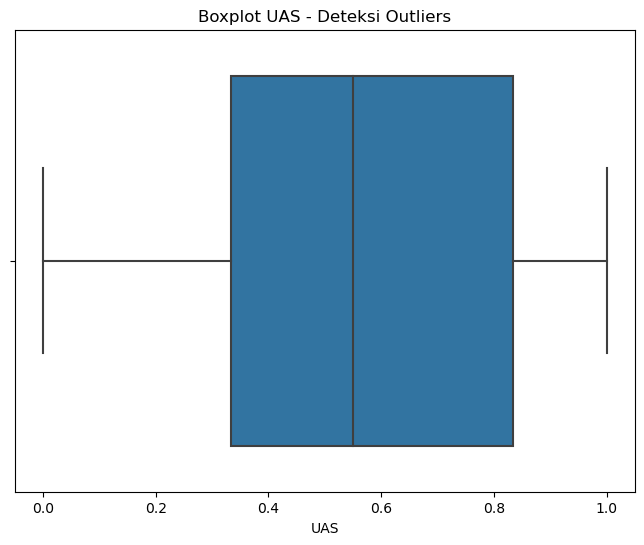

In [23]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    print(f"\nMendeteksi outliers pada kolom: {col}")
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < batas_bawah) | (df[col] > batas_atas)]
    print(f"Batas Bawah: {batas_bawah}, Batas Atas: {batas_atas}")
    print(f"Jumlah outliers di kolom {col}: {outliers.shape[0]}")
    
    if not outliers.empty:
        print(outliers[[col]])
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col} - Deteksi Outliers')
    plt.xlabel(col)
    plt.show()

####
Kode tersebut digunakan untuk mendeteksi apakah terdapat outliers pada data numerik dalam sebuah DataFrame.
Output pada kode tersebut menghasilkan data tersebut tidak terdapat outliers.


## Mengkategorikan Variabel 

In [20]:
import pandas as pd

file_path = 'C:/Users/hani/Downloads/Dataset Pelatihan.csv'
df = pd.read_csv(file_path)

def categorize_value(value, bins, labels):
    return pd.cut([value], bins=bins, labels=labels)[0]

bins = [0, 70, 85, 100]  
labels = ['Rendah', 'Sedang', 'Tinggi']

df['Kategori_Nilai'] = df['Nilai'].apply(lambda x: categorize_value(x, bins, labels))
df['Kategori_UTS'] = df['UTS'].apply(lambda x: categorize_value(x, bins, labels))
df['Kategori_UAS'] = df['UAS'].apply(lambda x: categorize_value(x, bins, labels))

print(df[['Nama', 'Nilai', 'Kategori_Nilai', 'UTS', 'Kategori_UTS', 'UAS', 'Kategori_UAS']].head())

   Nama  Nilai Kategori_Nilai   UTS Kategori_UTS   UAS Kategori_UAS
0  Budi   85.0         Sedang  90.0       Tinggi  80.0       Sedang
1   Ani   77.5         Sedang  75.0       Sedang  80.0       Sedang
2  Joko   90.0         Tinggi  85.0       Sedang  95.0       Tinggi
3  Siti   60.0         Rendah  55.0       Rendah  65.0       Rendah
4  Agus   77.5         Sedang  80.0       Sedang  75.0       Sedang


####
Kode di atas dirancang untuk mengategorikan data numerik (nilai ujian) menjadi kategori yang lebih mudah dipahami, yaitu "Rendah", "Sedang", dan "Tinggi".


## Mentransformasikan Data

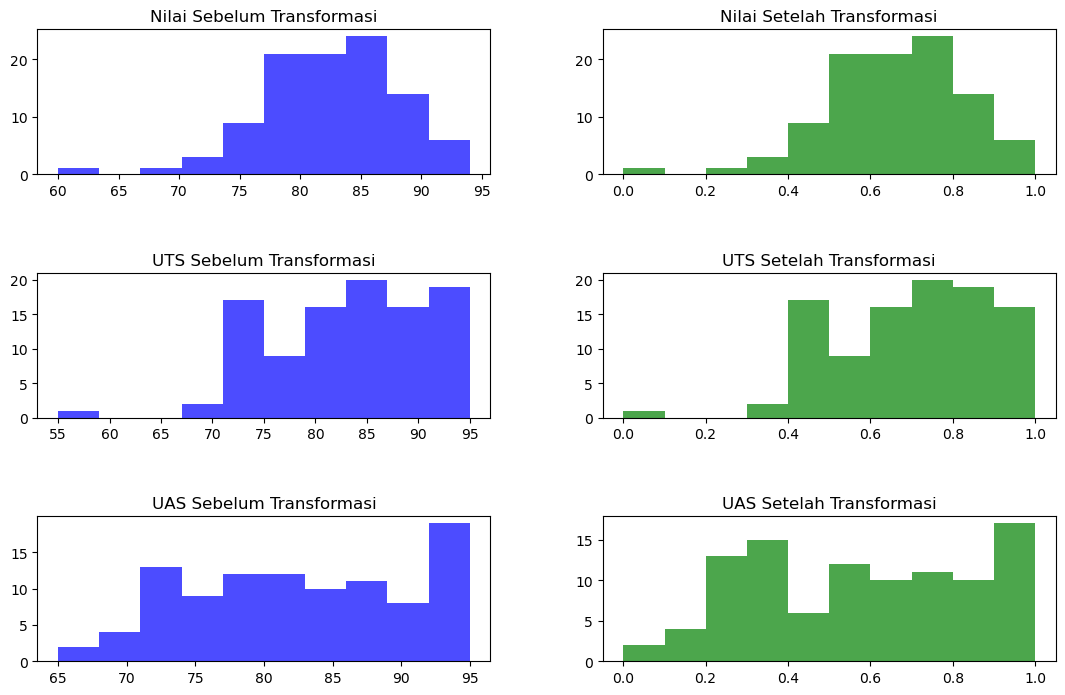

In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def plot_before_after(df_before, df_after, columns):
    fig, axs = plt.subplots(len(columns), 2, figsize=(12, 8))
    fig.tight_layout(pad=5.0)

    for i, col in enumerate(columns):
        # Plot before
        axs[i, 0].hist(df_before[col], bins=10, color='blue', alpha=0.7)
        axs[i, 0].set_title(f'{col} Sebelum Transformasi')
        
        # Plot after
        axs[i, 1].hist(df_after[col], bins=10, color='green', alpha=0.7)
        axs[i, 1].set_title(f'{col} Setelah Transformasi')

    plt.show()

scaler = MinMaxScaler()
df_before_transform = df[['Nilai', 'UTS', 'UAS']].copy()

df[['Nilai', 'UTS', 'UAS']] = scaler.fit_transform(df[['Nilai', 'UTS', 'UAS']])

columns_to_plot = ['Nilai', 'UTS', 'UAS']
plot_before_after(df_before_transform, df, columns_to_plot)

####
Kode ini melakukan penskalaan min-maks untuk menormalkan data di kolom Nilai, UTS, dan UAS.
Proses ini mengubah nilai asli  dalam  rentang berbeda menjadi nilai baru dalam rentang 0 hingga 1.
Tujuan dari konversi ini adalah: Meningkatkan kinerja model: Model pembelajaran mesin seperti regresi, SVM, dan K-NN lebih sensitif terhadap data berskala seragam.
Penskalaan min-maks memfasilitasi pembelajaran model  dengan memastikan bahwa semua fitur berada dalam rentang yang sama.
Data lebih mudah diinterpretasikan: nilai yang ditransformasikan berada dalam rentang yang lebih mudah untuk diinterpretasikan dan dibandingkan satu sama lain.
Visualisasi: Histogram menunjukkan distribusi data sebelum dan sesudah transformasi.
Data keluaran pada skala yang berbeda akan lebih terorganisir dan sesuai dengan rentang yang diinginkan.